This notebook processes gene enrichment data and generates bar plot.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pipe_util2

# Load 150CM data 

In [2]:
enrich_150cm_150d6_file = "data_for_volcano_plot/150CM_vs_150D6.csv"
enrich_150cm_150d6 = pd.read_csv(enrich_150cm_150d6_file, header = 0)
enrich_150cm_150d6.head(3)

,150CM vs 150D6,NES,Size
0,GO_POSITIVE_REGULATION_OF_CYTOSKELETON_ORGANIZ...,1.701487,5
1,GO_ACTIN_FILAMENT_ORGANIZATION,1.654707,6
2,GO_SUPRAMOLECULAR_FIBER_ORGANIZATION,1.161885,23


In [3]:
go_terms_150 = enrich_150cm_150d6["150CM vs 150D6"].str[3:]
go_terms_150 = go_terms_150.str.replace("_", " ", regex=False)
go_terms_150 = go_terms_150.str.capitalize()
go_terms_150.sort_values()

6                          Actin filament based process
1                           Actin filament organization
22                                  Biological adhesion
20                                   Cell cell adhesion
23                      Cell cell junction organization
19                               Cell junction assembly
21                           Cell junction organization
12                             Cell projection assembly
7                                   Cilium organization
17                 Epithelial to mesenchymal transition
4                         Epithelial tube morphogenesis
11                Establishment of localization in cell
13        Establishment or maintenance of cell polarity
15                 Extracellular structure organization
3                                 Membrane organization
10       Microtubule polymerization or depolymerization
14            Negative regulation of cell cell adhesion
0      Positive regulation of cytoskeleton organ

# load 600 data

In [4]:
enrich_600_150d6_file = "data_for_volcano_plot/600D6_vs_150D6.csv"
enrich_600_150d6 = pd.read_csv(enrich_600_150d6_file, header = 0)
enrich_600_150d6.head(3)

,600D6 vs 150D6,NES,Size
0,GO_POSITIVE_REGULATION_OF_LOCOMOTION,1.990480,66
1,GO_EPITHELIAL_TO_MESENCHYMAL_TRANSITION,1.341778,17
2,GO_REGULATION_OF_CELL_PROJECTION_ASSEMBLY,0.818372,23


In [6]:
enrich_600_150d6

,600D6 vs 150D6,NES,Size
0,GO_POSITIVE_REGULATION_OF_LOCOMOTION,1.990480,66
1,GO_EPITHELIAL_TO_MESENCHYMAL_TRANSITION,1.341778,17
2,GO_REGULATION_OF_CELL_PROJECTION_ASSEMBLY,0.818372,23
3,GO_CELL_CELL_ADHESION,1.742446,70
4,GO_NEGATIVE_REGULATION_OF_CELL_CELL_ADHESION,2.194488,19
5,GO_CELL_JUNCTION_ORGANIZATION,0.813762,38
6,GO_CELL_CELL_JUNCTION_ORGANIZATION,0.918560,23
7,GO_CELL_JUNCTION_ASSEMBLY,0.978226,31
8,GO_BIOLOGICAL_ADHESION,2.023021,131
9,GO_EXTRACELLULAR_STRUCTURE_ORGANIZATION,1.318490,38


In [7]:
go_terms_600 = enrich_600_150d6["600D6 vs 150D6"].str[3:]
go_terms_600 = go_terms_600.str.replace("_", " ", regex=False)
go_terms_600 = go_terms_600.str.capitalize()
go_terms_600.sort_values()

18                         Actin filament based process
16                          Actin filament organization
8                                   Biological adhesion
3                                    Cell cell adhesion
6                       Cell cell junction organization
7                                Cell junction assembly
5                            Cell junction organization
12                             Cell projection assembly
10                                  Cilium organization
1                  Epithelial to mesenchymal transition
13                        Epithelial tube morphogenesis
22                Establishment of localization in cell
11        Establishment or maintenance of cell polarity
9                  Extracellular structure organization
23                                Membrane organization
17       Microtubule polymerization or depolymerization
4             Negative regulation of cell cell adhesion
21     Positive regulation of cytoskeleton organ

The GO terms for 600 and 150CM are the same. Thus we can use only the go_terms_150.

# Enrichment data 150CM

In [18]:
go_terms = go_terms_150

# Obtain the selected condition
enrich_150cm_150d6["150CM vs 150D6"] = go_terms
enrich_150cm_150d6.sort_values(by="NES", ascending=False, inplace = True)
enrich_150cm_150d6.head(3)

,150CM vs 150D6,NES,Size
0,Positive regulation of cytoskeleton organization,1.701487,5
1,Actin filament organization,1.654707,6
2,Supramolecular fiber organization,1.161885,23


In [19]:
enrich_150cm_150d6.columns[0]

'150CM vs 150D6'

# Enrichment data 600

In [20]:
go_terms = go_terms_600

enrich_600_150d6["600D6 vs 150D6"] = go_terms
enrich_600_150d6.sort_values(by="NES", ascending=False, inplace = True)
enrich_600_150d6.head(3)

,600D6 vs 150D6,NES,Size
4,Negative regulation of cell cell adhesion,2.194488,19
8,Biological adhesion,2.023021,131
0,Positive regulation of locomotion,1.990480,66


In [21]:
enrich_600_150d6.shape

(24, 3)

In [22]:
enrich_600_150d6.columns[0]

'600D6 vs 150D6'

# Merge 150 and 600 data

In [23]:
enrich_600_150cm = pd.merge(
    left = enrich_600_150d6, 
    right = enrich_150cm_150d6, 
    left_on = "600D6 vs 150D6",
    right_on = "150CM vs 150D6", 
    how = "outer"
)

In [24]:
enrich_600_150cm.shape

(24, 6)

In [26]:
enrich_600_150cm.head()

,600D6 vs 150D6,NES_x,Size_x,150CM vs 150D6,NES_y,Size_y
0,Negative regulation of cell cell adhesion,2.194488,19,Negative regulation of cell cell adhesion,-0.893796,5
1,Biological adhesion,2.023021,131,Biological adhesion,-1.388153,32
2,Positive regulation of locomotion,1.990480,66,Positive regulation of locomotion,-1.124300,17
3,Cell cell adhesion,1.742446,70,Cell cell adhesion,-1.280338,13
4,Epithelial to mesenchymal transition,1.341778,17,Epithelial to mesenchymal transition,-0.987393,5


# Plot bar

In [27]:
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [160]:
def draw_hbar_sharex(df_input, savefile, w=6, h=7):
    """
    df_input - input dataframe."""
    
    df = df_input.copy()
    norm = mpl.colors.Normalize(vmin = -2, vmax = 2) # setting color bar scale
    cmap = cm.bwr
    
    fig = plt.figure(figsize = (w, h))
    
    # --------------------------------------------------------------
    ax1 = plt.subplot(121)
    
    y_label = df[df.columns[0]] # y axis is the first column
    y_pos = np.arange(df.shape[0])*1.5
    
    x_val = df.Size_x # name 
    
    ax1.barh(y_pos, x_val, 
             color=cmap(df.NES_x), # name
             height=1, align = "center")
    
    for i, v in enumerate(y_pos):
        ax1.text(x_val[i]+15, v + .25, str(round(x_val[i])), 
                color='k', fontsize=8)
    
    ax1.set_yticks(y_pos, labels = y_label, fontsize = 11)
    ax1.set_xlabel("Number of genes", fontsize=14)
    ax1.set_title("600D6", loc="right", fontsize=14)
    
    ax1.margins(x = 0.3)
    ax1.invert_yaxis()  # labels read top-to-bottom
    ax1.invert_xaxis()
    
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(True)
    ax1.spines['left'].set_visible(True)
    
    #-----------------------------------------------------------
    
    ax2 = plt.subplot(122, sharey=ax1)
    
    y_label = df[df.columns[0]] # y axis is the first column
    y_pos = np.arange(df.shape[0])*1.5
    
    x_val = df.Size_y # name 
    
    ax2.barh(y_pos, x_val, 
             color=cmap(df.NES_y), # name
             height=1, align = "center")
    
    for i, v in enumerate(y_pos):
        ax2.text(x_val[i]+0.3, v + .25, str(round(x_val[i])), 
                color='k', fontsize=8)
    
    ax2.margins(x = 0.3)
    
    ax2.axes.yaxis.set_visible(False)
    ax2.set_xlabel("Number of genes", fontsize=14)
    ax2.set_title("150CM", loc="right", fontsize=14)
    
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(True)
    ax2.spines['left'].set_visible(False)
    
    # colorbar
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) 
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="7%", pad=0.15)
    cbar = plt.colorbar(sm, cax = cax)
    cbar.set_label('NES', rotation=270, labelpad=9)
    cbar.outline.set_visible(False)
    
    plt.savefig(savefile, dpi = 200, bbox_inches = "tight")

    plt.show()
    
    plt.clf()
    

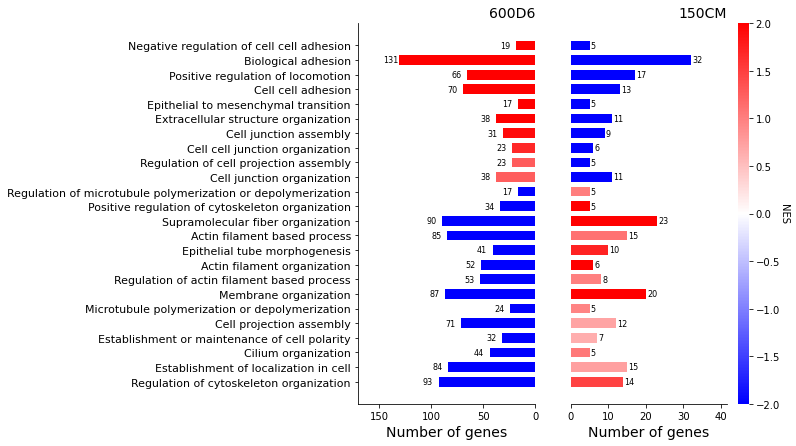

<Figure size 432x288 with 0 Axes>

In [161]:
draw_hbar_sharex(enrich_600_150cm, "Paired_bar.png",7,7)


In [ ]:
def draw_hbar(df_input, w = 7, h = 5):
    """
    df_input - input dataframe, including column go terms, NES and Size"""
    
    df = df_input.copy()
    norm = mpl.colors.Normalize(vmin = -2, vmax = 2)
    cmap = cm.bwr
    
    df.loc[df.NES<0,"Size"] = df[df.NES<0].Size*(-1.)
    
    fig = plt.figure(figsize=(w, h))
    ax = plt.subplot(111)
    
    y_label = df[df.columns[0]]
    y_pos = np.arange(df.shape[0])*1.5
    
    x_val = df.Size
    
#     print(df.NES)
    
    ax.barh(y_pos, x_val, 
            color=cmap(df.NES),
            height=1, align = "center")
    
    for i, v in enumerate(y_pos):
        if x_val[i]>0:
            ax.text(x_val[i]+1, v + .25, str(round(x_val[i])), 
                    color='k', fontsize=8)
        if x_val[i]<0:
            ax.text(x_val[i]-6, v + .25, str(round(x_val[i]*(-1.))), 
                    color='k', fontsize=8)
    
    # colorbar
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) 
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.15)
    cbar = plt.colorbar(sm, cax = cax)
    cbar.set_label('NES', rotation=270, labelpad=9)
    cbar.outline.set_visible(False)

    ax.set_yticks(y_pos, labels = y_label, fontsize = 9)
    ax.set_xlabel("Gene number")
    ax.set_xlim([-39,30])
    
    ax.invert_yaxis()  # labels read top-to-bottom
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    
#     ax.set_aspect(2)
    
    plt.tight_layout()
#     plt.show()
    plt.savefig("GO enrichment.png", dpi=200)
    
draw_hbar(enrich_150cm_150d6)